In [1]:
pip install pydotplus

fish: Unknown command: fish_add_path
/usr/share/fish/vendor_conf.d/snapd.fish (line 3): 
fish_add_path -aP $snap_bin_path
^
from sourcing file /usr/share/fish/vendor_conf.d/snapd.fish
	called on line 294 of file /usr/share/fish/config.fish
from sourcing file /usr/share/fish/config.fish
	called during startup
You should consider upgrading via the '/home/a/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pd.read_csv("shows.csv")

df

,Age,Experience,Rank,Nationality,Apply
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [3]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Apply'] = df['Apply'].map(d)

print(df)

    Age  Experience  Rank  Nationality  Apply
0    36          10     9            0      0
1    42          12     4            1      0
2    23           4     6            2      0
3    52           4     4            1      0
4    43          21     8            1      1
5    44          14     5            0      0
6    66           3     7            2      1
7    35          14     9            0      1
8    52          13     7            2      1
9    35           5     9            2      1
10   24           3     5            1      0
11   18           3     7            0      1
12   45           9     9            0      1


In [4]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Apply']

print(X)
print(y) 

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Apply, dtype: int64


# train_test_split

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = False)

In [7]:
X_train

,Age,Experience,Rank,Nationality
0,36,10,9,0
1,42,12,4,1
2,23,4,6,2
3,52,4,4,1
4,43,21,8,1
5,44,14,5,0
6,66,3,7,2
7,35,14,9,0
8,52,13,7,2
9,35,5,9,2


In [8]:
X_test

,Age,Experience,Rank,Nationality
10,24,3,5,1
11,18,3,7,0
12,45,9,9,0


In [9]:
y_train

0    0
1    0
2    0
3    0
4    1
5    0
6    1
7    1
8    1
9    1
Name: Apply, dtype: int64

In [10]:
y_test

10    0
11    1
12    1
Name: Apply, dtype: int64

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


rand_est = RandomForestClassifier(n_estimators=1000)
rand_est.fit(X_train,y_train)

y_pred = rand_est.predict(X_test)
y_pred
# print(' The Score on the test set with a random forest classifier is:', rand_est.score(X_test,y_test))
# he Root mean squared error
# print("Mean squared error: %.2f"
# % np.sqrt(mean_squared_error(y_test, y_pred)))

array([0, 0, 0])

In [12]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

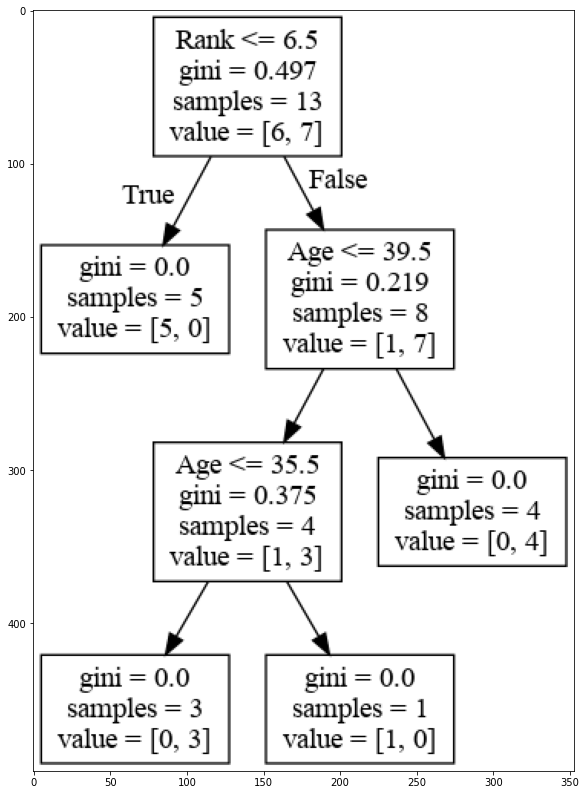

In [13]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, 
                            feature_names=features)
# write below two lines of codes 5,6 if you have pydotplus installed
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')
plt.figure(figsize = (20, 14))
img=pltimg.imread('mydecisiontree.png')

imgplot = plt.imshow(img)

plt.show() 